<h1> IMPORTING  & INSTALLATION <h1>

In [155]:
#import packags, functions and classes
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from folium.plugins import FastMarkerCluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import folium

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



<h2> LOADING OUR DATASET <h2>

In [113]:
extra_data= pd.read_csv('/Users/da_m1_52/Downloads/extra_data.csv')
TestSM_df = pd.read_csv('/Users/da_m1_52/Downloads/TestSM.csv')
TrainSM = pd.read_csv('/Users/da_m1_52/Downloads/TrainSM.csv')

Group by average the user income,user id
drop user id and transaction
siplit the date to months,days and hours

In [167]:

extra_data.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm


In [166]:
TrainSM.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


Concatenating TrainSM and extra_data

In [168]:
conc_df = pd.concat([TrainSM,extra_data], axis=0)
conc_df.shape

(10373, 12)

In [ ]:
s = pd.get_dummies(conc_df['MERCHANT_CATEGORIZED_AS'], prefix_sep='_', drop_first=False)
conc_df = s.join(conc_df)
conc_df.head()

SPLITTING COLUMNS

In [116]:
conc_df['DayOfWeek'] = pd.to_datetime(conc_df['MERCHANT_CATEGORIZED_AT']).dt.day
conc_df['Month'] = pd.to_datetime(conc_df['MERCHANT_CATEGORIZED_AT']).dt.month_name()
conc_df['Hour'] = pd.to_datetime(conc_df['MERCHANT_CATEGORIZED_AT']).dt.hour
conc_df['Year'] = pd.to_datetime(conc_df['MERCHANT_CATEGORIZED_AT']).dt.year
conc_df

conc_df['DayOfWeekPURCHASED'] = pd.to_datetime(conc_df['PURCHASED_AT']).dt.day
conc_df['MonthPURCHASED'] = pd.to_datetime(conc_df['PURCHASED_AT']).dt.month_name()
conc_df['HourPURCHASED'] = pd.to_datetime(conc_df['PURCHASED_AT']).dt.hour
conc_df['YearPURCHASED'] = pd.to_datetime(conc_df['PURCHASED_AT']).dt.year
conc_df




TestSM_df['DayOfWeek'] = pd.to_datetime(TestSM_df['MERCHANT_CATEGORIZED_AT']).dt.day
TestSM_df['Month'] = pd.to_datetime(TestSM_df['MERCHANT_CATEGORIZED_AT']).dt.month_name()
TestSM_df['Hour'] = pd.to_datetime(TestSM_df['MERCHANT_CATEGORIZED_AT']).dt.hour
TestSM_df['Year'] = pd.to_datetime(TestSM_df['MERCHANT_CATEGORIZED_AT']).dt.year
TestSM_df

TestSM_df['DayOfWeekPURCHASED'] = pd.to_datetime(TestSM_df['PURCHASED_AT']).dt.day
TestSM_df['MonthPURCHASED'] = pd.to_datetime(TestSM_df['PURCHASED_AT']).dt.month_name()
TestSM_df['HourPURCHASED'] = pd.to_datetime(TestSM_df['PURCHASED_AT']).dt.hour
TestSM_df['YearPURCHASED'] = pd.to_datetime(TestSM_df['PURCHASED_AT']).dt.year
TestSM_df


,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,DayOfWeek,Month,Hour,Year,DayOfWeekPURCHASED,MonthPURCHASED,HourPURCHASED,YearPURCHASED
0,2022-06-01 10:25:16.7131+00,KCB PAYBILL AC,150000,2022-05-05 08:29:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx,1,June,10,2022,5,May,8,2022
1,2022-03-16 13:05:51.851102+00,IPAY LTD,7394,2019-10-05 16:02:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f,16,March,13,2022,5,October,16,2019
2,2022-03-10 18:25:42.112294+00,JOHN NJIRU GAKUNJU,200,2021-11-25 09:56:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no,10,March,18,2022,25,November,9,2021
3,2022-04-12 15:59:14.139347+00,UONSDA CHURCH OFFERING-MAIN,50,2022-04-11 14:48:00+00,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd,12,April,15,2022,11,April,14,2022
4,2022-05-04 10:24:26.709045+00,M-SHWARI LOCK SAVINGS,10000,2022-05-04 13:59:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c,4,May,10,2022,4,May,13,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2021-11-26 08:29:58.261766+00,CARREFOUR GLR,6606,2021-11-27 15:18:00+00,False,NaN,Male,3,200000,ID_ECX9BS4A,ID_zvole537,26,November,8,2021,27,November,15,2021
554,2022-04-12 15:59:14.139347+00,LEAH NGOGA,928,2022-01-25 09:41:00+00,True,NaN,Male,5,252000,ID_3JA0MAFB,ID_zy4igt1w,12,April,15,2022,25,January,9,2022
555,2022-04-12 15:59:14.139347+00,DECATHLON HUB TILL 5,30,2022-02-10 14:21:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_zy4urqmq,12,April,15,2022,10,February,14,2022
556,2022-05-31 13:27:24.704992+00,JERUSA A OTIENO,50000,2019-09-07 18:24:00+00,True,NaN,Female,3,85000,ID_J8O7LHZ2,ID_zym0pkxl,31,May,13,2022,7,September,18,2019


FILLING THE NULLS FOR CONCACTENATE DATAFRAME
SPLITTING DATA TO MONTHS, DAYS AND HOURS FOR CONCACTENATE THE TEST AND TRAIN DATAFRAME


In [118]:

# USER_AGE
conc_df['USER_AGE'].fillna(conc_df['USER_AGE'].mean(), inplace=True)

#USER_GENDER
conc_df['USER_GENDER'].fillna('Unknown', inplace=True)

# Convert the 'MERCHANT_CATEGORIZED_AT' column to pandas datetime format
conc_df['MERCHANT_CATEGORIZED_AT'] = pd.to_datetime(conc_df['MERCHANT_CATEGORIZED_AT'])

# Calculate the mean of the non-missing values in the 'MERCHANT_CATEGORIZED_AT' column (optional)
mean_merchant_categorized_at = conc_df['MERCHANT_CATEGORIZED_AT'].mean()

# Fill missing values with the mean (optional)
conc_df['MERCHANT_CATEGORIZED_AT'].fillna(mean_merchant_categorized_at, inplace=True)

# Remove the extra space in the column name 'MERCHANT_CATEGORIZED_AS'
conc_df.rename(columns={'MERCHANT_CATEGORIZED_AS ': 'MERCHANT_CATEGORIZED_AS'}, inplace=True)

# Fill missing values in 'MERCHANT_CATEGORIZED_AS' with the mode (most frequent category)
mode_merchant_categorized_as = conc_df['MERCHANT_CATEGORIZED_AS'].mode()[0]
conc_df['MERCHANT_CATEGORIZED_AS'].fillna(mode_merchant_categorized_as, inplace=True)
# DayOfWeek
conc_df['DayOfWeek'].fillna(conc_df['DayOfWeek'].mean(), inplace=True)

# Convert month names to numerical representation (e.g., January -> 1, February -> 2, etc.)
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

conc_df['Month'] = conc_df['Month'].map(month_to_number)

# Calculate the mean of the non-missing values in the 'Month' column
mean_month = conc_df['Month'].mean()
mode_year = conc_df['Year'].mode()
# Fill missing values with the mean
conc_df['Month'].fillna(mean_month, inplace=True)
conc_df['Year'].fillna( mode_year, inplace=True)

# Hour
conc_df['Hour'].fillna(conc_df['Hour'].mean(), inplace=True)

# USER_AGE
TestSM_df['USER_AGE'].fillna(TestSM_df['USER_AGE'].mean(), inplace=True)

#USER_GENDER
TestSM_df['USER_GENDER'].fillna(TestSM_df['USER_GENDER'].mode(), inplace=True)

In [119]:
null_counts = conc_df.isnull().sum()
print(null_counts)

Bills & Fees                                 0
Data & WiFi                                  0
Education                                    0
Emergency fund                               0
Family & Friends                             0
Going out                                    0
Groceries                                    0
Health                                       0
Loan Repayment                               0
Miscellaneous                                0
Rent / Mortgage                              0
Shopping                                     0
Transport & Fuel                             0
MERCHANT_CATEGORIZED_AT                      0
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                      0
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                     0
USER_GENDER                                  0
USER_HOUSEHOL

In [ ]:
conc_df

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,...,USER_ID,Transaction_ID,DayOfWeek,Month,Hour,Year,DayOfWeekPURCHASED,MonthPURCHASED,HourPURCHASED,YearPURCHASED
0,0,0,0,0,0,0,0,0,0,0,...,ID_ZX4DCF4K,ID_04mk78fa,4.0,May,10.0,2022.0,4,May,13,2022
0,0,0,0,0,0,0,0,0,0,0,...,ID_R4T8Q46J,ID_v13grrw3,NaN,NaN,NaN,NaN,22,March,12,2021
0,0,0,0,0,0,0,0,0,0,0,...,ID_ZX4DCF4K,ID_04mk78fa,4.0,May,10.0,2022.0,4,May,13,2022
0,0,0,0,0,0,0,0,0,0,0,...,ID_R4T8Q46J,ID_v13grrw3,NaN,NaN,NaN,NaN,22,March,12,2021
1,0,0,0,0,0,0,0,0,0,0,...,ID_U9WZMGJZ,ID_04xkfb07,25.0,October,16.0,2021.0,24,October,14,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,ID_F7B7BAJ0,ID_6arln23v,NaN,NaN,NaN,NaN,9,April,15,2022
9996,0,0,0,0,0,0,0,0,0,0,...,ID_F7B7BAJ0,ID_msuxva0z,NaN,NaN,NaN,NaN,9,April,9,2022
9997,0,0,0,0,0,0,0,0,0,0,...,ID_F7B7BAJ0,ID_flro17hp,NaN,NaN,NaN,NaN,10,April,18,2022
9998,0,0,0,0,0,0,0,0,0,0,...,ID_B5KBXPAO,ID_bb2ghfuy,NaN,NaN,NaN,NaN,29,December,11,2021


In [ ]:

#Checking for duplicates in our Dataset
duplicates = conc_df.duplicated().sum()
duplicates

#Checking for duplicates in our Dataset
duplicates = TestSM_df.duplicated().sum()
duplicates

0

In [ ]:
null_counts = conc_df.isnull().sum()
print(null_counts)

null_counts = TestSM_df.isnull().sum()
print(null_counts)

Bills & Fees                                 0
Data & WiFi                                  0
Education                                    0
Emergency fund                               0
Family & Friends                             0
Going out                                    0
Groceries                                    0
Health                                       0
Loan Repayment                               0
Miscellaneous                                0
Rent / Mortgage                              0
Shopping                                     0
Transport & Fuel                             0
MERCHANT_CATEGORIZED_AT                  10373
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10373
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  9484
USER_GENDER                                 64
USER_HOUSEHOL

In [120]:
conc_df.to_csv('Smart_Money_df.csv', index=False)
smart_money_df = pd.read_csv('Smart_Money_df.csv')

In [33]:
column_data_types = smart_money_df.dtypes
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)
numerical_columns = smart_money_df.select_dtypes(include=[np.number])

Categorical Columns:
['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASED_AT', 'USER_GENDER', 'USER_ID', 'Transaction_ID', 'MonthPURCHASED']

Numerical Columns:
['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund', 'Family & Friends', 'Going out', 'Groceries', 'Health', 'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping', 'Transport & Fuel', 'PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME', 'DayOfWeek', 'Month', 'Hour', 'Year', 'DayOfWeekPURCHASED', 'HourPURCHASED', 'YearPURCHASED']


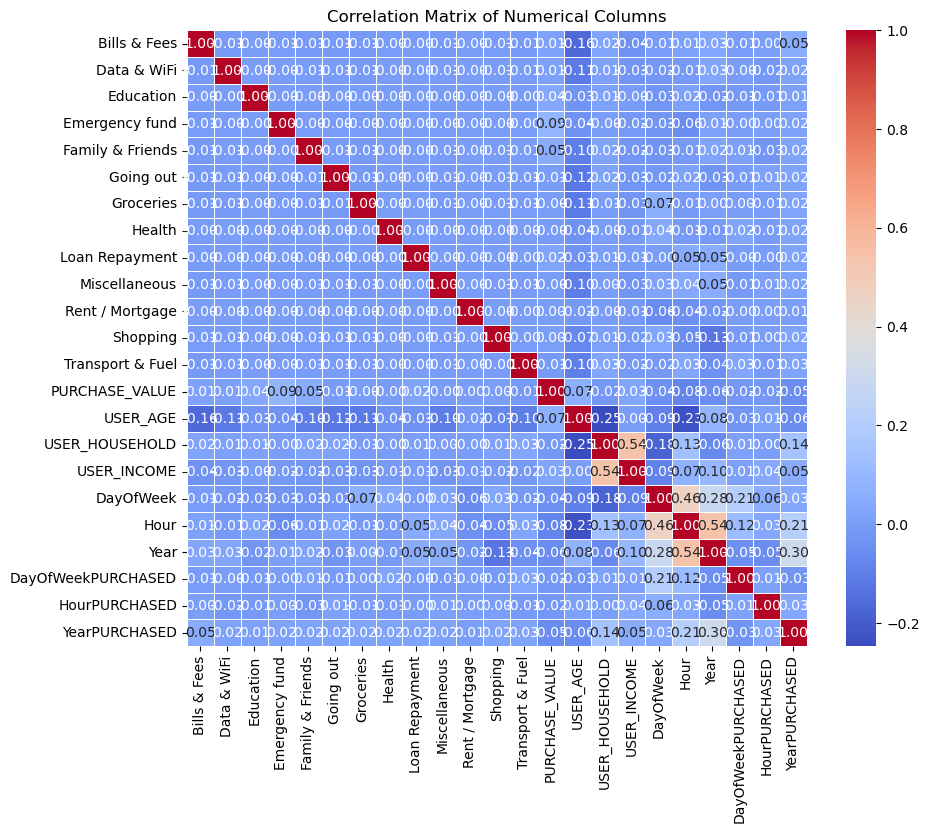

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

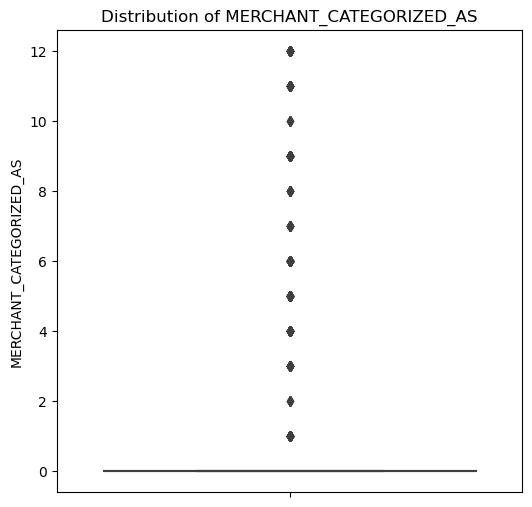

In [158]:
label_encoder = LabelEncoder()
smart_money_df['smart_money_df'] = label_encoder.fit_transform(smart_money_df['MERCHANT_CATEGORIZED_AS'])

# Now you can plot the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=smart_money_df['MERCHANT_CATEGORIZED_AS'])
plt.title("Distribution of MERCHANT_CATEGORIZED_AS")
plt.show()

In [159]:
Q1 =smart_money_df['MERCHANT_CATEGORIZED_AS'].quantile(0.25)
Q3 = smart_money_df['MERCHANT_CATEGORIZED_AS'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 0.0


In [160]:
print("Skewness:", smart_money_df['MERCHANT_CATEGORIZED_AS'].skew())
print("Kurtosis:", smart_money_df['MERCHANT_CATEGORIZED_AS'].kurt())

Skewness: 5.411506761575572
Kurtosis: 30.216146267106332


In [163]:
subset_df =smart_money_df[['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'PURCHASED_AT', 'USER_GENDER', 'USER_ID', 'Transaction_ID', 'Month', 'MonthPURCHASED','MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME', 'DayOfWeek', 'Hour', 'Year', 'DayOfWeekPURCHASED', 'HourPURCHASED', 'YearPURCHASED']]

In [175]:
 
# Replace inf values with a large finite value (e.g., 1e9) and fill NaN values with 0
subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
subset_df.fillna(0, inplace=True)

# Create a list of numeric column names
numeric_columns = subset_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the VIF for each numeric variable
vif = pd.DataFrame()
vif["Variable"] = numeric_columns
vif["VIF"] = [variance_inflation_factor(subset_df[numeric_columns].values, i) for i in range(len(numeric_columns))]

# Print the VIF values
print(vif)

/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_2426/3584330679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_2426/3584330679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.fillna(0, inplace=True)
/Users/da_m1_52/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                   Variable          VIF
0   MERCHANT_CATEGORIZED_AT    40.861876
1             MERCHANT_NAME     5.167914
2              PURCHASED_AT     4.494711
3               USER_GENDER     2.281811
4                   USER_ID     4.602595
5                     Month          NaN
6            MonthPURCHASED     3.525873
7   MERCHANT_CATEGORIZED_AS     2.629649
8            PURCHASE_VALUE     1.087600
9                  USER_AGE  1063.972534
10           USER_HOUSEHOLD     5.185958
11              USER_INCOME     2.554629
12                DayOfWeek    42.201564
13                     Hour   207.087279
14                     Year     3.262423
15       DayOfWeekPURCHASED     4.128595
16            HourPURCHASED     9.693662
17            YearPURCHASED  1269.101729


In [ ]:
smart_money_df.columns

Index(['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS',
       'PURCHASE_VALUE', 'PURCHASED_AT',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'Transaction_ID',
       'DayOfWeek', 'Month', 'Hour', 'Year', 'DayOfWeekPURCHASED',
       'MonthPURCHASED', 'HourPURCHASED', 'YearPURCHASED', 'smart_money_df'],
      dtype='object')

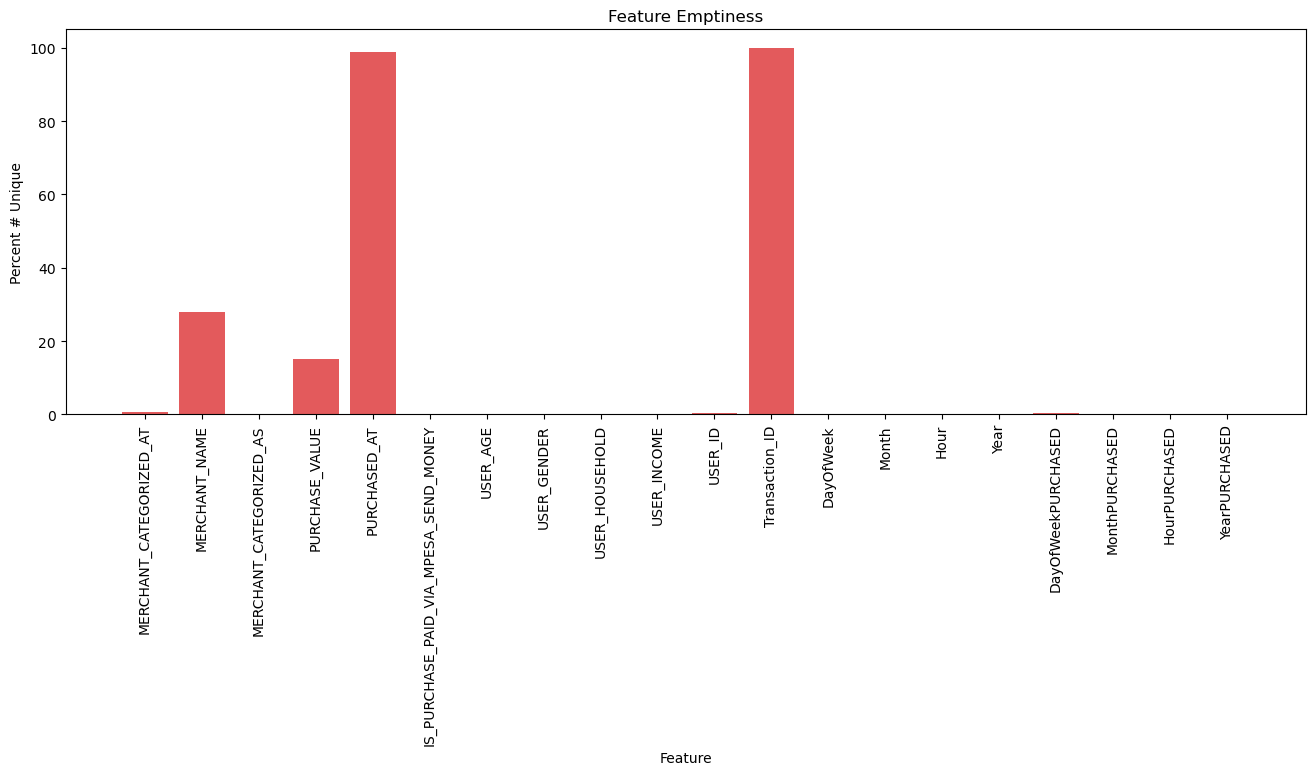

In [ ]:


# Assuming you have loaded the DataFrame as 'smart_money_df'

# Get the data types of all columns in the DataFrame
data_types = smart_money_df.dtypes

# Initialize dictionaries to store unique value counts and percentages
unique_value_counts = {}
percentage_unique = {}

# Loop through all columns and calculate the unique value counts and percentages for each data type
for column in smart_money_df.columns:
    dtype = data_types[column]
    unique_values = smart_money_df[column].nunique()
    total_values = smart_money_df.shape[0]
    unique_value_counts[column] = unique_values
    percentage_unique[column] = unique_values / total_values * 100

# Plot the results
fig, ax = plt.subplots(figsize=(16, 5))
ax.bar(percentage_unique.keys(), percentage_unique.values(), color='#E35A5C')
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.xticks(rotation=90)
plt.show()


In [ ]:
column_data_types = smart_money_df.dtypes

# Separate columns into categorical and numerical
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASED_AT', 'USER_GENDER', 'USER_ID', 'Transaction_ID', 'Month', 'MonthPURCHASED']

Numerical Columns:
['PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME', 'DayOfWeek', 'Hour', 'Year', 'DayOfWeekPURCHASED', 'HourPURCHASED', 'YearPURCHASED', 'smart_money_df']


In [ ]:
column_data_types = TestSM_df.dtypes

# Separate columns into categorical and numerical
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'PURCHASED_AT', 'USER_GENDER', 'USER_ID', 'Transaction_ID', 'Month', 'MonthPURCHASED']

Numerical Columns:
['PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME', 'DayOfWeek', 'Hour', 'Year', 'DayOfWeekPURCHASED', 'HourPURCHASED', 'YearPURCHASED']


In [122]:
encodingRest = LabelEncoder()
smart_money_df["MERCHANT_CATEGORIZED_AT"] = encodingRest.fit_transform(smart_money_df["MERCHANT_CATEGORIZED_AT"])

smart_money_df["MERCHANT_CATEGORIZED_AS"] = encodingRest.fit_transform(smart_money_df["MERCHANT_CATEGORIZED_AS"])

smart_money_df["PURCHASED_AT"] = encodingRest.fit_transform(smart_money_df["PURCHASED_AT"])

smart_money_df["USER_GENDER"] = encodingRest.fit_transform(smart_money_df["USER_GENDER"])

smart_money_df["USER_ID"] = encodingRest.fit_transform(smart_money_df["USER_ID"])

smart_money_df["Month"] = encodingRest.fit_transform(smart_money_df["Month"])

smart_money_df["MonthPURCHASED"] = encodingRest.fit_transform(smart_money_df["MonthPURCHASED"])

smart_money_df["MERCHANT_NAME"] = encodingRest.fit_transform(smart_money_df["MERCHANT_NAME"])

In [123]:
encodingRest = LabelEncoder()
TestSM_df["MERCHANT_NAME"] = encodingRest.fit_transform(TestSM_df["MERCHANT_NAME"])

TestSM_df["PURCHASED_AT"] = encodingRest.fit_transform(TestSM_df["PURCHASED_AT"])

TestSM_df["USER_GENDER"] = encodingRest.fit_transform(TestSM_df["USER_GENDER"])

TestSM_df["Month"] = encodingRest.fit_transform(TestSM_df["Month"])

TestSM_df["MonthPURCHASED"] = encodingRest.fit_transform(TestSM_df["MonthPURCHASED"])


In [124]:
TestSM_df.head()


,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,DayOfWeek,Month,Hour,Year,DayOfWeekPURCHASED,MonthPURCHASED,HourPURCHASED,YearPURCHASED
0,2022-06-01 10:25:16.7131+00,145,150000,442,True,26.525382,1,5,150000,ID_O8P8YS18,ID_00x9h2yx,1,5,10,2022,5,8,8,2022
1,2022-03-16 13:05:51.851102+00,107,7394,17,False,26.525382,0,1,10000,ID_40L9OTIM,ID_01db594f,16,6,13,2022,5,10,16,2019
2,2022-03-10 18:25:42.112294+00,127,200,216,False,26.525382,0,1,85000,ID_1I8XYBWK,ID_07pm99no,10,6,18,2022,25,9,9,2021
3,2022-04-12 15:59:14.139347+00,297,50,377,False,26.525382,1,2,10000,ID_GR569FUO,ID_09jryhkd,12,0,15,2022,11,0,14,2022
4,2022-05-04 10:24:26.709045+00,166,10000,439,False,26.525382,1,3,10000,ID_ZX4DCF4K,ID_0ccv924c,4,7,10,2022,4,8,13,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2021-11-26 08:29:58.261766+00,35,6606,222,False,26.525382,1,3,200000,ID_ECX9BS4A,ID_zvole537,26,8,8,2021,27,9,15,2021
554,2022-04-12 15:59:14.139347+00,160,928,247,True,26.525382,1,5,252000,ID_3JA0MAFB,ID_zy4igt1w,12,0,15,2022,25,4,9,2022
555,2022-04-12 15:59:14.139347+00,55,30,273,False,26.525382,1,5,252000,ID_3JA0MAFB,ID_zy4urqmq,12,0,15,2022,10,3,14,2022
556,2022-05-31 13:27:24.704992+00,121,50000,12,True,26.525382,0,3,85000,ID_J8O7LHZ2,ID_zym0pkxl,31,7,13,2022,7,11,18,2019


In [125]:
smart_money_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,...,USER_ID,Transaction_ID,DayOfWeek,Month,Hour,Year,DayOfWeekPURCHASED,MonthPURCHASED,HourPURCHASED,YearPURCHASED
0,0,0,0,0,0,0,0,0,0,0,...,39,ID_04mk78fa,4.00000,0,10.000000,2022.0,4,8,13,2022
1,0,0,0,0,0,0,0,0,0,0,...,31,ID_v13grrw3,13.02681,0,12.292225,2022.0,22,7,12,2021
2,0,0,0,0,0,0,0,0,0,0,...,39,ID_04mk78fa,4.00000,0,10.000000,2022.0,4,8,13,2022
3,0,0,0,0,0,0,0,0,0,0,...,31,ID_v13grrw3,13.02681,0,12.292225,2022.0,22,7,12,2021
4,0,0,0,0,0,0,0,0,0,0,...,33,ID_04xkfb07,25.00000,0,16.000000,2021.0,24,10,14,2021


In [126]:
# Assuming you have a DataFrame called 'smart_money_df' and it contains the 'MERCHANT_NAME' column with 'int64' data type.

# Convert 'MERCHANT_NAME' to object (string) data type
smart_money_df['MERCHANT_NAME'] = smart_money_df['MERCHANT_NAME'].astype(float)

# # Verify the data type after conversion
# smart_money_df["MERCHANT_NAME"].astype(float)


<H2>  MACHINE LEARNING <H2>

In [127]:


target = smart_money_df['Bills & Fees']
X = smart_money_df.drop(['Transaction_ID','MERCHANT_CATEGORIZED_AS','MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID', 'Data & WiFi','Year',	'Education',	'Emergency fund',	'Family & Friends',	'Going out'	,'Groceries',	'Health',	'Loan Repayment',	'Miscellaneous',	'Rent / Mortgage',	'Shopping',	'Transport & Fuel', 'Bills & Fees' ], axis=1)
xTest = TestSM_df.drop(['Transaction_ID', 'MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID',"Year"], axis=1)

scale = StandardScaler()
scaledX = scale.fit_transform(X)

scaletest = StandardScaler()
scaledXtest = scaletest.fit_transform(xTest)

print(scaledX)


[[ 1.46652083e+00 -4.14010619e-02 -1.77602969e-01 ...  7.53649777e-01
   9.74104485e-02  1.17357159e+00]
 [-3.69721879e-02 -2.51628504e-01 -1.77602969e-01 ...  4.63940810e-01
  -1.35215577e-01  7.86295061e-03]
 [ 1.46652083e+00 -4.14010619e-02 -1.77602969e-01 ...  7.53649777e-01
   9.74104485e-02  1.17357159e+00]
 ...
 [-8.91718678e-03 -2.51628504e-01 -1.77602969e-01 ... -1.56402196e+00
   1.26054058e+00  1.17357159e+00]
 [-1.43844702e+00  1.29226245e+01 -1.77602969e-01 ... -9.84604025e-01
  -3.67841604e-01  7.86295061e-03]
 [-5.85319938e-01 -2.41617673e-01 -1.77602969e-01 ... -1.27431299e+00
   1.26054058e+00  7.86295061e-03]]


In [78]:
TestSM_df

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,DayOfWeek,Month,Hour,Year,DayOfWeekPURCHASED,MonthPURCHASED,HourPURCHASED,YearPURCHASED
0,2022-06-01 10:25:16.7131+00,145,150000,442,True,26.525382,1,5,150000,ID_O8P8YS18,ID_00x9h2yx,1,5,10,2022,5,8,8,2022
1,2022-03-16 13:05:51.851102+00,107,7394,17,False,26.525382,0,1,10000,ID_40L9OTIM,ID_01db594f,16,6,13,2022,5,10,16,2019
2,2022-03-10 18:25:42.112294+00,127,200,216,False,26.525382,0,1,85000,ID_1I8XYBWK,ID_07pm99no,10,6,18,2022,25,9,9,2021
3,2022-04-12 15:59:14.139347+00,297,50,377,False,26.525382,1,2,10000,ID_GR569FUO,ID_09jryhkd,12,0,15,2022,11,0,14,2022
4,2022-05-04 10:24:26.709045+00,166,10000,439,False,26.525382,1,3,10000,ID_ZX4DCF4K,ID_0ccv924c,4,7,10,2022,4,8,13,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2021-11-26 08:29:58.261766+00,35,6606,222,False,26.525382,1,3,200000,ID_ECX9BS4A,ID_zvole537,26,8,8,2021,27,9,15,2021
554,2022-04-12 15:59:14.139347+00,160,928,247,True,26.525382,1,5,252000,ID_3JA0MAFB,ID_zy4igt1w,12,0,15,2022,25,4,9,2022
555,2022-04-12 15:59:14.139347+00,55,30,273,False,26.525382,1,5,252000,ID_3JA0MAFB,ID_zy4urqmq,12,0,15,2022,10,3,14,2022
556,2022-05-31 13:27:24.704992+00,121,50000,12,True,26.525382,0,3,85000,ID_J8O7LHZ2,ID_zym0pkxl,31,7,13,2022,7,11,18,2019


In [157]:
# bills
lr =  AdaBoostClassifier()
d = ['Bills & Fees','Data & WiFi',	'Education',	'Emergency fund',	'Family & Friends',	'Going out'	,'Groceries',	'Health',	'Loan Repayment',	'Miscellaneous',	'Rent / Mortgage',	'Shopping',	'Transport & Fuel']
preds = []
for i in d:
    target = smart_money_df[i]
    model = lr.fit(scaledX, target)
    preds0 = model.predict_proba(scaledXtest)[:, 1]
    TestSM_df[i] = preds0.round(2)
zee = ['Transaction_ID','Bills & Fees','Data & WiFi',	'Education',	'Emergency fund',	'Family & Friends',	'Going out'	,'Groceries',	'Health',	'Loan Repayment',	'Miscellaneous',	'Rent / Mortgage',	'Shopping',	'Transport & Fuel']
submission = TestSM_df[zee]
submission.to_csv("olona33.csv",  index=False)
submission


,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.46,0.45,0.48,0.31,0.48,0.31,0.30,0.17,0.28,0.30,0.14,0.31,0.18
1,ID_01db594f,0.45,0.45,0.23,0.28,0.44,0.46,0.46,0.04,0.42,0.46,0.16,0.44,0.26
2,ID_07pm99no,0.48,0.48,0.10,0.31,0.30,0.32,0.50,0.29,0.26,0.32,0.09,0.46,0.50
3,ID_09jryhkd,0.49,0.48,0.04,0.17,0.29,0.32,0.47,0.03,0.29,0.20,0.08,0.28,0.49
4,ID_0ccv924c,0.49,0.47,0.26,0.48,0.46,0.47,0.47,0.17,0.17,0.47,0.42,0.49,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ID_zvole537,0.47,0.48,0.07,0.31,0.47,0.47,0.47,0.24,0.27,0.45,0.10,0.45,0.47
554,ID_zy4igt1w,0.47,0.48,0.16,0.29,0.45,0.31,0.46,0.29,0.43,0.31,0.02,0.45,0.30
555,ID_zy4urqmq,0.47,0.48,0.15,0.17,0.28,0.18,0.47,0.14,0.28,0.18,0.04,0.45,0.32
556,ID_zym0pkxl,0.45,0.44,0.14,0.30,0.47,0.30,0.46,0.09,0.26,0.45,0.07,0.46,0.16
